### How good is the Great Weapon Fighter (GWP) Feat in Dungeons and Dragons?


## Great Weapon Master

**Prerequisite:** Strength 13 or higher

**You've learned to put the weight of a weapon to your advantage, letting its momentum empower your strikes. You gain the following benefits:**

- On your turn, when you score a critical hit with a melee weapon or reduce a creature to 0 hit points with one, you can make one melee weapon attack as a bonus action.

- Before you make a melee attack with a heavy weapon that you are proficient with, you can choose to take a -5 penalty to the attack roll. If the attack hits, you add +10 to the attack's damage.


In [7]:
#   Imports
import random
import matplotlib.pyplot as plt
from statistics import mean

In [8]:
def simulateAttacks(toHit, gwp = False, ac = 10):   #   This function will simulate attacks
    damage = 0
    if gwp == True: #   Applying the penalty and reward if GWP is active
        toHit -= 5
        damage += 10
    if toHit >= ac:
        damage += random.randint(1,9)
        return damage
    else:
        return 0
def roll(dice): #   This function will simulate a dice roll
    x = random.randint(1, dice+1)
    return(x)


### Testing damage without GWP

In [11]:
damageNo = []
turns = 100000 # We're doing this over 100,000 turns.
for i in range(turns):
    damageNo.append(simulateAttacks(roll(20)))
f"You'll do on average {mean(damageNo):.3f} without great weapon master"
    

"You'll do on average 2.862 without great weapon master"

### Testing damage with GWP

In [17]:
damageGWP = []
for i in range(turns):
    damageGWP.append(simulateAttacks(roll(20), gwp=True))
percent = (mean(damageNo)/mean(damageGWP))*100
f"You'll do on average {mean(damageGWP):.3f} with great weapon master"


"You'll do on average 5.003 with great weapon master"

In [18]:
f"Damage with Great Weapon fighter goes up by {percent:.2f}% on average."

'Damage with Great Weapon fighter goes up by 57.21% on average.'

## How much health is it worth to turn on GWP?

In [25]:
def healthArr(incriment, over): #   Returns an array of health
    health = []
    for i in range(1, over+1):
        health.append(i*incriment)
    return health


In [49]:
health = healthArr(1, 100)
average = []
for i in health:    #   The purpose of this code is to simulate how long it takes to kill somethign with a certian amount of health 100 times
    damage = 0
    tempAverage = []
    currentSim = 0
    endSim = 1000
    while currentSim != endSim:
        turns = 0
        damage = 0 
        turnsNeeded = [] 
        while damage < i:
            turns += 1
            damage += simulateAttacks(random.randint(1,21))
            turnsNeeded.append(turns)
        tempAverage.append(mean(turnsNeeded))
        currentSim += 1
    average.append(mean(tempAverage))
averageGWP = []
for i in health:
    damage = 0
    tempAverage = []
    currentSim = 0
    endSim = 1000   #   Will simulate over 1000 times then average
    while currentSim != endSim:
        turns = 0
        damage = 0  # Reset damage for each simulation
        turnsNeeded = []  # Reset turnsNeeded for each simulation
        while damage < i:
            turns += 1
            damage += simulateAttacks(random.randint(1,21), gwp=True)
            turnsNeeded.append(turns)
        tempAverage.append(mean(turnsNeeded))
        currentSim += 1
    averageGWP.append(mean(tempAverage))

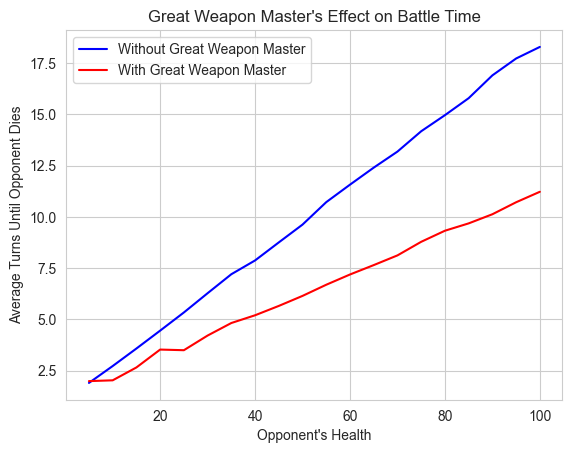

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# Plotting data as line charts
sns.lineplot(x=health, y=average, color='blue', label='Without Great Weapon Master')
sns.lineplot(x=health, y=averageGWP, color='red', label='With Great Weapon Master')

# Adding labels and title
plt.xlabel("Opponent's Health")
plt.ylabel("Average Turns Until Opponent Dies")
plt.title("Great Weapon Master's Effect on Battle Time")

plt.legend()

plt.grid(True)



## Should you have Great Weapon Master always active?
### Maybe
- Without bonuses Great Weapon Master is incredibly inconsistent. 
- The larger the sample size, the higher the average is.
- Against your run of the mill lankies with less than 10 health, Great Weapon Master is not nessesary especially if you have a party.

## Conclusion

- You simply do more damage over time with the use of the Great Weapon Master feat.
- Use Great Weapon Master against those with higher health pools like a boss.
- Use Great Weapn Master when given bonuses like Advantage (Rolling two dice and taking the higher of the two). 


